In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [3]:
data = pd.read_csv("../work_03/奖牌.csv")
data2 = data.iloc[-5:,:].reset_index(drop=True)

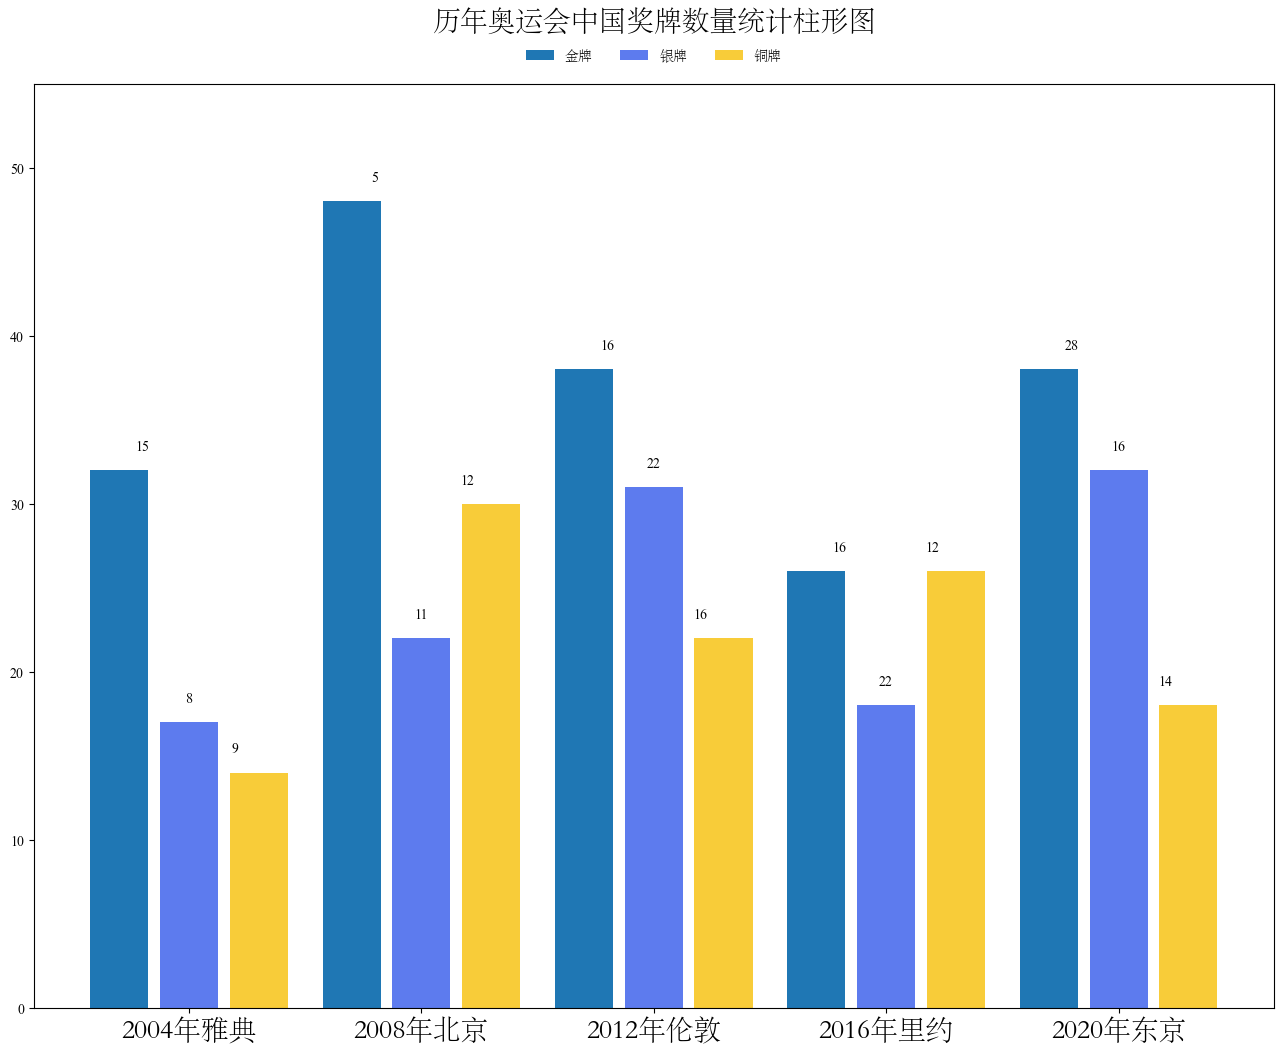

In [5]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ["Times New Roman"]
x = np.arange(data2.shape[0])
plt.figure(figsize=(16,12),dpi=100)
rects1 = plt.bar(x-.3,height=data2["金牌"],width=.25,label = "金牌")
rects2 = plt.bar(x,height=data2["银牌"],width=.25,color = "#5d7bee",label = "银牌")
rects3 = plt.bar(x+.3,height=data2["铜牌"],width=.25,color="#f8cc39",label=  "铜牌")
ax=plt.gca()
plt.title("历年奥运会中国奖牌数量统计柱形图",fontdict={"family":"STsong"},size=20,y = 1.05)
plt.ylim(0,55)
lists = []
for i in range(data2.shape[0]):
    lists.append(data2.iloc[i,0])
plt.legend(loc = "upper center",ncol = 3,
           bbox_to_anchor=(0.5, 1.05),
           prop= FontProperties(family='STsong'),
           fancybox = False,
           framealpha = 0)
plt.xticks(ticks=x,labels=lists,fontproperties='STsong',fontsize = 20)
for i in range(data2.shape[0]):
    plt.text(x[i]-.2,data2["金牌"][i]+1,data["金牌"][i],va = "bottom",ha = "center")
    plt.text(x[i],data2["银牌"][i]+1,data["银牌"][i],va = "bottom",ha = "center")
    plt.text(x[i]+.2,data2["铜牌"][i]+1,data["铜牌"][i],va = "bottom",ha = "center")
plt.show()

In [13]:
from matplotlib.patches import FancyBboxPatch


# 圆角柱形图设置函数
def get_round_rect(rects,ec='black',fc='#96c8d6'):
    bb = rects.get_bbox()
    patch = FancyBboxPatch((bb.xmin,bb.ymin), # 左下角的坐标
                          abs(bb.width),abs(bb.height),
                          boxstyle="Round, pad=0, rounding_size=0.05", # 补丁的样式
                          ec=ec,fc=fc,linewidth=1,
                           mutation_aspect=4,
                           mutation_scale=1,
                          )
    return patch

In [9]:
  !pip install matplotx

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


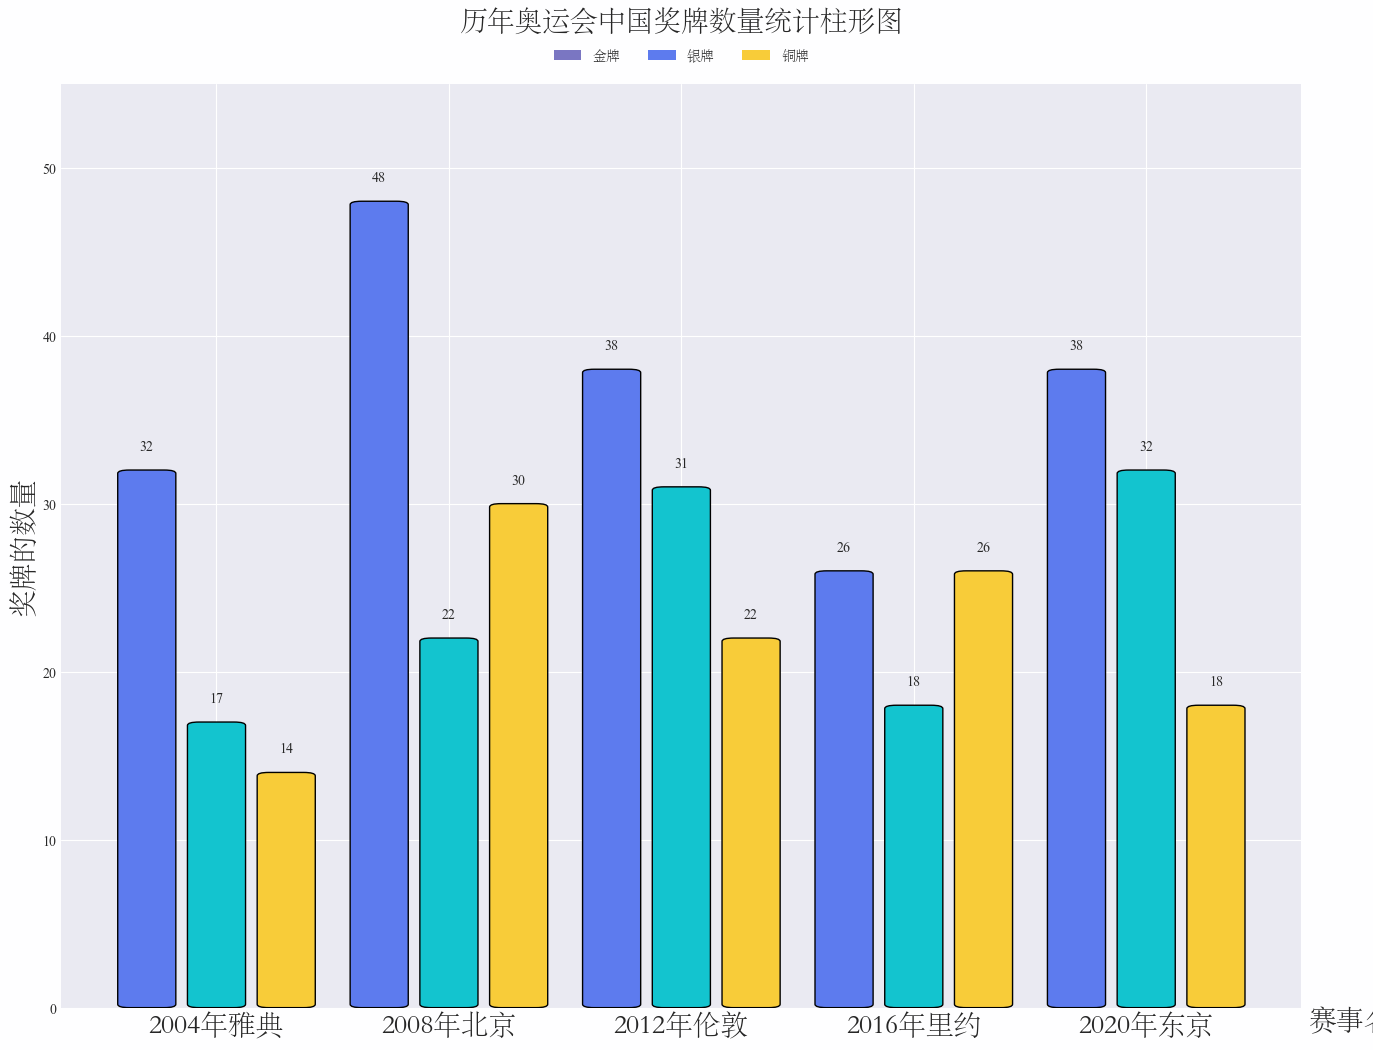

In [23]:
import matplotx
from matplotlib.font_manager import FontProperties
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    plt.rcParams['font.sans-serif'] = ["Times New Roman"]
    x = np.arange(data2.shape[0])
    plt.figure(figsize=(16,12),dpi=100)
    rects1 = plt.bar(x-.3,height=data2["金牌"],width=.25,label = "金牌")
    rects2 = plt.bar(x,height=data2["银牌"],width=.25,color = "#5d7bee",label = "银牌")
    rects3 = plt.bar(x+.3,height=data2["铜牌"],width=.25,color="#f8cc39",label=  "铜牌")
    ax=plt.gca()
    for rect in zip(rects1,rects2,rects3):
        rect[0].remove()
        rect[1].remove()
        rect[2].remove()
        patch1 = get_round_rect(rect[0], fc="#5d7bee")
        patch2 = get_round_rect(rect[1], fc="#13c4cf")
        patch3 = get_round_rect(rect[2], fc="#f8cc39")
        ax.add_patch(patch1)
        ax.add_patch(patch2)
        ax.add_patch(patch3)
    plt.ylim(0,55)
    lists = []
    for i in range(data2.shape[0]):
        lists.append(data2.iloc[i,0])
    plt.legend(loc = "upper center",ncol = 3,
               bbox_to_anchor=(0.5, 1.05),
               prop= FontProperties(family='STsong'),
               fancybox = False,
               framealpha = 0)
    plt.xticks(ticks=x,labels=lists,fontproperties='STsong',fontsize = 20)
    for i in range(data2.shape[0]):
        plt.text(x[i]-.3,data2["金牌"][i]+1,data2["金牌"][i],va = "bottom",ha = "center")
        plt.text(x[i],data2["银牌"][i]+1,data2["银牌"][i],va = "bottom",ha = "center")
        plt.text(x[i]+.3,data2["铜牌"][i]+1,data2["铜牌"][i],va = "bottom",ha = "center")
    plt.xlabel("赛事名称",fontdict={"family":"STsong"},fontsize= 20,)
    ax.xaxis.set_label_coords(1.05 ,0)
    plt.ylabel("奖牌的数量",fontdict={"family":"STsong"},fontsize= 20)
    plt.title("历年奥运会中国奖牌数量统计柱形图",fontdict={"family":"STsong"},size=20,y = 1.05)
plt.show()